In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
import string

## Get the Data

**Get data**

In [158]:
df1 = pd.read_csv('tweet1.csv')
df2 = pd.read_csv('tweet2.csv')
df3 = pd.read_csv('tweet3.csv')
df4 = pd.read_csv('tweet4.csv')
df5 = pd.read_csv('tweet5.csv')
df6 = pd.read_csv('tweet6.csv')
df7 = pd.read_csv('tweet7.csv')
df8 = pd.read_csv('tweet8.csv')
df9 = pd.read_csv('tweet9.csv')
df10 = pd.read_csv('tweet10.csv')
df11 = pd.read_csv('tweet11.csv')
df12 = pd.read_csv('tweet12.csv')

Data ingested from Twitter and manually labeled

**Concatinate the dataframes**

In [159]:
frames = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]

In [160]:
result = pd.concat(frames)

In [161]:
result = result.drop(labels='sentiment (S)', axis=1)

In [162]:
len(result.index)

1144

**DATA**

In [163]:
result.head()

,id (S),company (S),content (S),createdAt (S),keyword (S),tweetId (N),user (S),userId (N)
0,cf842bca-b58e-4686-95e3-43f6f63c0a49,AIGInsurance,@aigkenham @AiG God says you don't need to wor...,not,AIG,8.99687e+17,AidanStreet,4.807950e+07
1,b7701300-52e2-4d30-abce-d38829cda22c,GEICO,RT @FactsOnFox: .@GEICO Your ads on #FoxNews s...,negative,GEICO,8.97936e+17,AtheComm,8.776025e+17
2,13fdb266-95b3-4e65-9c3f-205f5ad9259f,GEICO,RT @killmefam: N Koreas 1st Target should b th...,negative,GEICO,8.99651e+17,woezyb,7.070237e+17
3,c1770d7f-9209-42f7-9c26-ba90f1e4d786,GEICO,@geico #skytypers lined up https://t.co/JaUoyA...,neutral,GEICO,8.99659e+17,acpresspamela,7.866205e+07
4,078d1960-740f-427d-a975-de1cdc0450ee,GEICO,I love Geico,positive,GEICO,8.99641e+17,Bar3lyL0gical,4.124504e+09


**Filter dataset**

In [164]:
result_clean = result[(result['createdAt (S)'] != 'not') | (result['createdAt (S)'] == 'nan')]

Filter out undesiered data

In [165]:
result_clean.rename(index=str, columns={"content (S)": "tweets", "createdAt (S)":"sentiments"}, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


Rename columns from 'content (S)' to tweets and 'createdAt (S)' to sentiments

In [166]:
len(result_clean.index)

650

Total tweets after filter is 618

In [167]:
result_clean.head()

,id (S),company (S),tweets,sentiments,keyword (S),tweetId (N),user (S),userId (N)
1,b7701300-52e2-4d30-abce-d38829cda22c,GEICO,RT @FactsOnFox: .@GEICO Your ads on #FoxNews s...,negative,GEICO,8.97936e+17,AtheComm,8.776025e+17
2,13fdb266-95b3-4e65-9c3f-205f5ad9259f,GEICO,RT @killmefam: N Koreas 1st Target should b th...,negative,GEICO,8.99651e+17,woezyb,7.070237e+17
3,c1770d7f-9209-42f7-9c26-ba90f1e4d786,GEICO,@geico #skytypers lined up https://t.co/JaUoyA...,neutral,GEICO,8.99659e+17,acpresspamela,7.866205e+07
4,078d1960-740f-427d-a975-de1cdc0450ee,GEICO,I love Geico,positive,GEICO,8.99641e+17,Bar3lyL0gical,4.124504e+09
6,c57fa40d-b8db-42e0-8294-c74bdd7bbd32,GEICO,Join the GEICO team! See our latest #job openi...,neutral,GEICO,8.99647e+17,GEICO_Jobs,2.013487e+08


## Data Analysis

### Add tweet length for analysis

In [168]:
result_clean['tweet_length'] = result_clean['tweets'].apply(str).apply(len)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [169]:
result_clean.columns

Index(['id (S)', 'company (S)', 'tweets', 'sentiments', 'keyword (S)',
       'tweetId (N)', 'user (S)', 'userId (N)', 'tweet_length'],
      dtype='object')

In [170]:
result_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 650 entries, 1 to 103
Data columns (total 9 columns):
id (S)          641 non-null object
company (S)     642 non-null object
tweets          642 non-null object
sentiments      642 non-null object
keyword (S)     642 non-null object
tweetId (N)     641 non-null object
user (S)        641 non-null object
userId (N)      641 non-null float64
tweet_length    650 non-null int64
dtypes: float64(1), int64(1), object(7)
memory usage: 50.8+ KB


In [171]:
result_clean['sentiments'].describe()

count         642
unique          3
top       neutral
freq          331
Name: sentiments, dtype: object

### Tweets per company

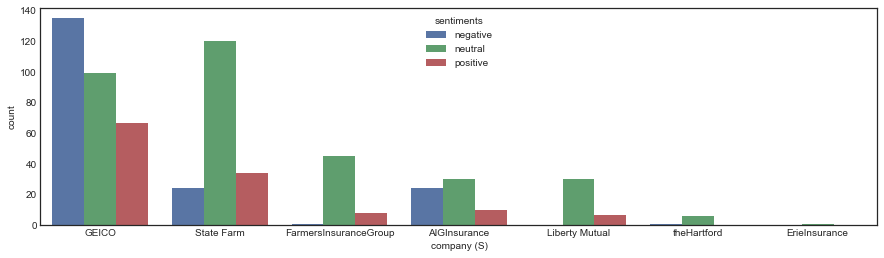

In [172]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(15,4))
sns.countplot(x='company (S)',data=result_clean,palette='deep', hue='sentiments')

We can conclude that GEICO has more twitter activity than all the other insurance companies; also has the most negative. 

In [173]:
result_clean.groupby('user (S)').count().head()

,id (S),company (S),tweets,sentiments,keyword (S),tweetId (N),userId (N),tweet_length
user (S),,,,,,,,
257scepticism,1,1,1,1,1,1,1,1
3BKn40PVm7QAxar,1,1,1,1,1,1,1,1
704_Diva,1,1,1,1,1,1,1,1
99ytteb,2,2,2,2,2,2,2,2
ACPressLoder,2,2,2,2,2,2,2,2


### Tweet length per sentiment

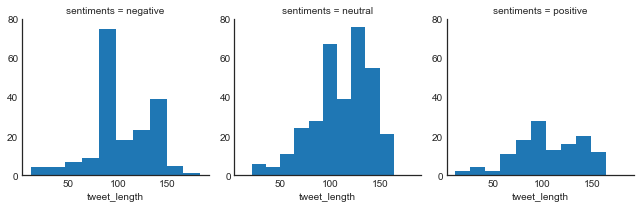

In [174]:
import matplotlib.pyplot as plt
sns.set_style('white')
%matplotlib inline
g = sns.FacetGrid(result_clean,col='sentiments')
g.map(plt.hist,'tweet_length')

Short tweets below 20 characters tend to positive, tweets in the area of 18 to 25 tend to be neutral

### Sentiment per Company

**Get the percentage of each sentiment for each comapny listed**

In [175]:
def get_percentage(company='AIGInsurance', sentiment='negative'):
    percentage = result_clean.groupby(['company (S)','sentiments'])['sentiments'].count().loc[company][sentiment]/result_clean.groupby(['company (S)','sentiments'])['sentiments'].count().loc[company].sum()
    print(company + ' sentiment of '+ sentiment+' is '+ str(round(percentage*100)) +'%')


**This function will get all the available sentiments per company**


In [176]:
def get_sentiment(companys='AIGInsurance'):
    """Add the company name"""
    this = []
    for i in result_clean.groupby(['company (S)','sentiments'])['sentiments'].unique().loc[companys]:
        this.append(''.join(c for c in i))
    return this

In [177]:
for company in result_clean['company (S)'].unique():
    company = str(company)
    if company != 'nan':
        sentiments = get_sentiment(companys=company)
        for sentiment in sentiments:
            sentiment = str(sentiment)
            if sentiment != 'nan':
                get_percentage(company=company, sentiment=sentiment)
            else:
                print(company, sentiment +' does not exist')             
    else:
        print(company +' does not exist')

GEICO sentiment of negative is 45.0%
GEICO sentiment of neutral is 33.0%
GEICO sentiment of positive is 22.0%
State Farm sentiment of negative is 13.0%
State Farm sentiment of neutral is 67.0%
State Farm sentiment of positive is 19.0%
FarmersInsuranceGroup sentiment of negative is 2.0%
FarmersInsuranceGroup sentiment of neutral is 83.0%
FarmersInsuranceGroup sentiment of positive is 15.0%
AIGInsurance sentiment of negative is 38.0%
AIGInsurance sentiment of neutral is 47.0%
AIGInsurance sentiment of positive is 16.0%
Liberty Mutual sentiment of neutral is 81.0%
Liberty Mutual sentiment of positive is 19.0%
theHartford sentiment of negative is 14.0%
theHartford sentiment of neutral is 86.0%
nan does not exist
ErieInsurance sentiment of neutral is 100.0%


As we can see, the percentage of each company's sentiment percentage. GEICO has the most negative tweets

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110ee72e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11121bac8>]], dtype=object)

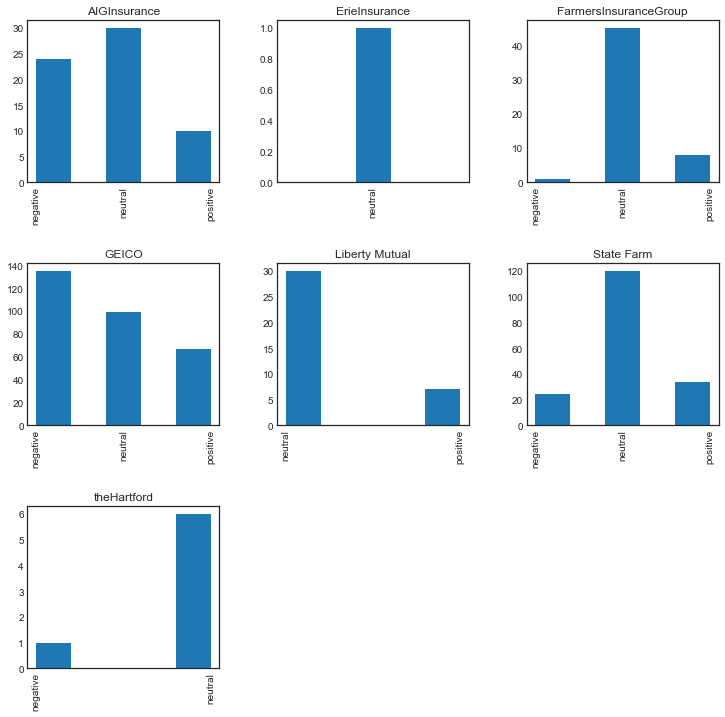

In [178]:
result_clean.hist(column='sentiments', by='company (S)', bins=5, figsize=(12,12))

Geico and AIG get a lot of negative tweets in comparision to their positive tweets. 

### Functions to provide data analysis

In [179]:
def text_process(mess):
    """
    1. remove punc
    2.remove stop words
    3. return list of clean text words
    """
    nopunc = ''.join([c for c in mess if c not in  string.punctuation])
    nostop = ' '.join([c for c in nopunc.split() if c.lower() not in stopwords.words('english')
                       and not c.startswith('@') and c != 'RT' and c.lower() != 'geico'
                       and c.lower() !='killmefam' and c.lower() != 'dude' 
                       and c.lower() != 'b' and c.lower() != 'ads' and c.lower() != 'koreas' 
                       and c != 'RT' and  c.lower() != 'n' and c.lower() != 'soundcloud' 
                       and c.lower() != '1st' and c.lower() != 'target' and 
                       c.lower() != 'b' and c.lower() != 'dude' and c.lower() != 'makin' and 
                       c.lower() != 'tha' ])
    return nostop

In [180]:
def removeit(mess):
    """
    1. remove punc
    2.remove stop words
    3. Take out common words
    """
    nopunc = ''.join([c for c in mess if c not in  string.punctuation])
    nostop = [c for c in nopunc.split() if c.lower() not in stopwords.words('english') 
                       and not c.startswith('@') and c != 'RT' and  c.lower() != 'n' and 
                       c.lower() != 'koreas' and c.lower() != '1st' and c.lower() != 'target' and 
                       c.lower() != 'b' and c.lower() != 'dude' and c.lower() != 'makin' and 
                       c.lower() != 'tha' and c.lower() != 'geico' and c.lower() != 'soundcloud' and 
                       c.lower() != 'ads' and c.lower() !='killmefam' and c.lower()!='rt' and 
                       c.lower() != 'statefarm' and c.lower() != 'aig']
#     words = ''.join([word for word in nostop if 'RT' not in word and not word.startswith('@') and word != 'RT' and word !='N Koreas 1st Target should b the dude makin tha geico soundcloud ads' ])
    return nostop

### Count words per sentiment

In [181]:
from collections import Counter
from nltk.corpus import stopwords
results_negative = result_clean[result_clean['sentiments']=='negative']
results_neutral = result_clean[result_clean['sentiments']=='neutral']
results_positive = result_clean[result_clean['sentiments']=='positive']
results_negative['tweets'].apply(text_process)
results_neutral['tweets'].apply(text_process)
results_positive['tweets'].apply(text_process).head()


4                                                  love
12    Well eclipse Back connecting StateFarm agents ...
25    Customer Engagement Linchpin Success FarmersIn...
34    AdamIsMyAgent GoodNeighbor mattnafziger☎️adami...
39    15 minutes could save 15 car insurance httpstc...
Name: tweets, dtype: object

Function to visualize each dominant word per sentiment

In [182]:
from wordcloud import WordCloud,STOPWORDS
def wordcloudit(width=3000,height=2500,dataframe=results_negative, background_color='black', tweet='tweets', mask=None ):
    """This Function will the the following:
        1. Get a series of tweets from a dataframe and change it to one string
        2. Clean the string by removing stopwords and other undesired words that don't have any weight on sentiments
        3. Create a wordcount per cleaned word and visualize
        
    Parameters Values are:
            width is the width of imagae of the wordcloud. Default=3000
            height is the width of imagae of the wordcloud. Default=2500
            dataframe is the Dataframe to be analyzed. Default=results_negative
            background_color is the color of the backgroud of the image of the wordcloud. Default='black'
            tweet is the column name of the tweets to be analyzed. Default='tweets'
            """
    nw= ' '.join(dataframe[tweet])
    cleaned_neg = " ".join([word for word in nw.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=background_color,
                          mask=mask,
                      width=width,
                      height=height
                     ).generate(cleaned_neg)
    
    plt.figure(1,figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    

       words  count
0  StateFarm     21
1  insurance     16
2        car     15
3        AiG     12
4        AIG     11


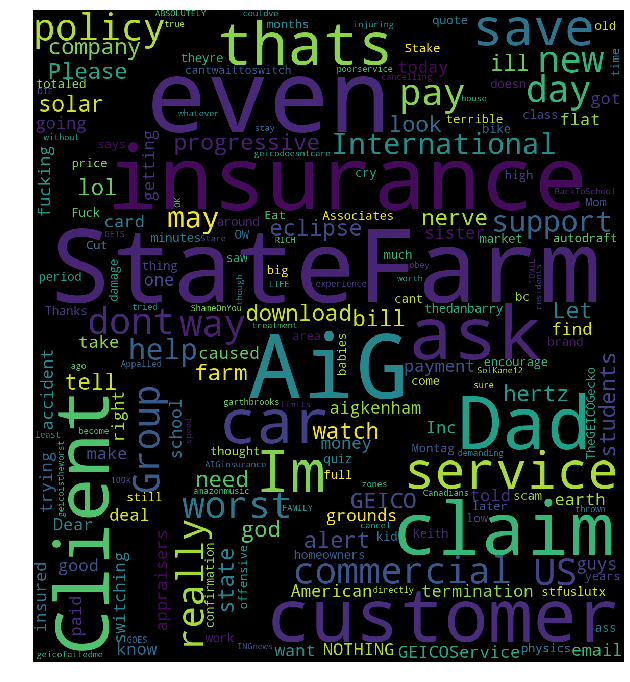

In [183]:
neg_words = Counter(" ".join(results_negative['tweets'].apply(text_process)).split()).most_common()
neg_words = pd.DataFrame.from_records(neg_words, columns=['words','count' ])
print(neg_words.head())
from os import path
from PIL import Image
thumbsdown = np.array(Image.open( "/Users/dougmengistu/Downloads/likeit-157252_1280.png"))
wordcloudit(dataframe=neg_words, background_color='black',mask=thumbsdown, width=2000, height=1500, tweet='words')

We can find that the Tweets with negative moods are frequently involved some words like cancelled, flight ,customer or hour. People might guess that customer tends to complain when they are waiting for the delayed flights.



       words  count
0  StateFarm     82
1  Insurance     67
2      Group     41
3      today     40
4    checked     38


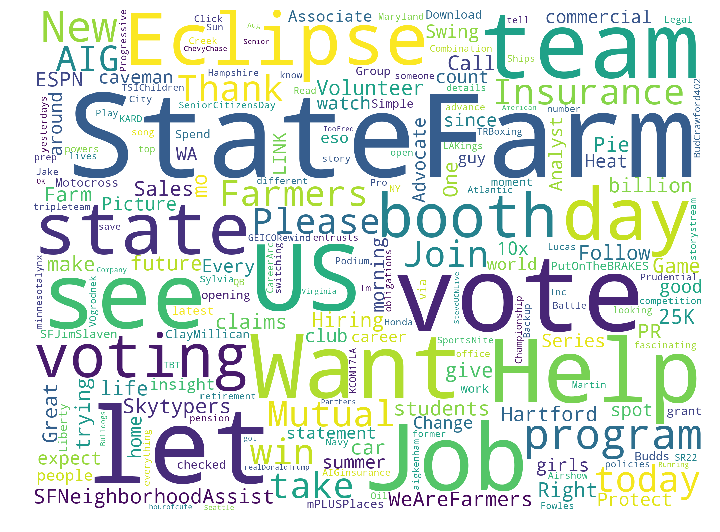

In [184]:
neut_words = Counter(" ".join(results_neutral['tweets'].apply(text_process)).split()).most_common()
neut_words = pd.DataFrame.from_records(neut_words, columns=['words','count' ])
print(neut_words.head())
wordcloudit(dataframe=neut_words, background_color='white', tweet='words', width=2000, height=1500)

Dominant words with an outcome of neutral sentiment

       words  count
0  insurance     50
1        car     44
2  switching     36
3  StateFarm     29
4      money     24


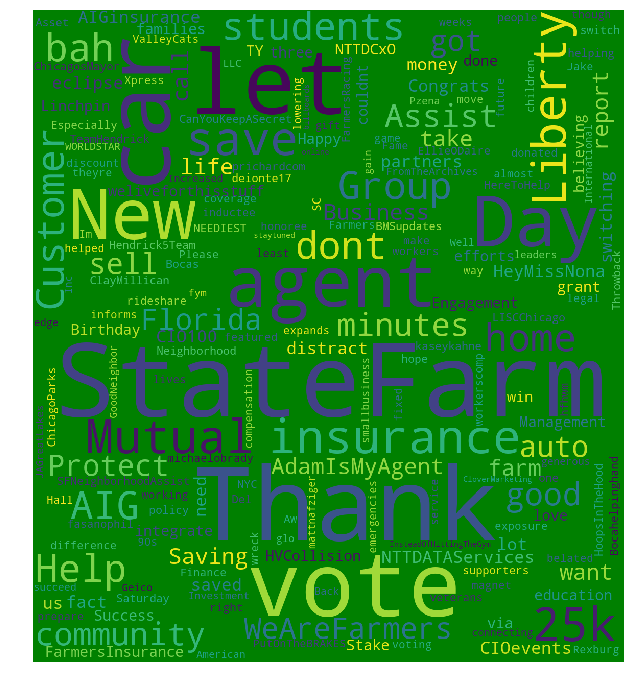

In [185]:
pos_words = Counter(" ".join(results_positive['tweets'].apply(text_process)).split()).most_common()
pos_words = pd.DataFrame.from_records(pos_words, columns=['words','count' ])
print(pos_words.head())
thumbsup = np.array(Image.open("/Users/dougmengistu/Downloads/like-157252_1280 (1).png"))
wordcloudit(dataframe=pos_words, background_color='green',mask=thumbsup, width=2500, height=1500,tweet='words')
# wordcloudit(dataframe=results_positive, background_color='red', tweet='tweets', mask=thumbsup)

Dominant words with an outcome of positive sentiment

## Preparing dataset for Machine Learning 

In [186]:
# g = result_clean[['tweets', 'tweet_length']]
# z = cv.fit_transform(g)
# g['tweets'].apply(str)
# g['tweet_length'].apply(str)
# # g['tweets'].apply(str).apply(text_process).apply(lambda x: ''.join(x), axis=1)
# g['tweet_len']= g[['tweets','tweet_length']].apply(str).apply(lambda x: ''.join(x))
# g


In [187]:
x = result_clean['tweets'].apply(str)
x.shape

(650,)

In [188]:
y = result_clean['sentiments'].apply(str)
y.shape

(650,)

Count Vectorizer converts a collection of words into number representations, example below

In [189]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
example = cv.fit_transform(["hi, me and you hi"])
print(example)

  (0, 3)	1
  (0, 0)	1
  (0, 2)	1
  (0, 1)	2


In [190]:
X = cv.fit_transform(x)
X.shape

(650, 1984)

**This function will take punctuations and stopwords out of the tweets**

In [191]:
def text_process(mess):
    """
    1. remove punc
    2.remove stop words
    3. return list of clean text words
    """
    nopunc = ''.join([c for c in mess if c not in  string.punctuation])
    nostop = [c for c in nopunc.split() if c.lower() not in stopwords.words('english')]
    return nostop

**This method will split training and testing datasets**

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=101)

The test size is 30% of the filtered dataset, and the training is the rest 70%. Note this is the default split.

# Multinomial Naive Bayes without Tfidf

**Multinomial Naive Bayes models the word counts and adjusts the formula to word counts. **

In [193]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

** Use X_train (70% of tweets) and y_train (70% of sentiment) to train the model**

In [194]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Predict X_test (30% of the tweets) that were not used to train the model**

In [195]:
print(type(X_test))

<class 'scipy.sparse.csr.csr_matrix'>


In [196]:
predictions = nb.predict(X_test)

In [197]:
from sklearn.metrics import confusion_matrix,classification_report

In [198]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 0  0  4  0]
 [ 0 43  3 11]
 [ 0 13 78 13]
 [ 0  2 10 18]]


             precision    recall  f1-score   support

        nan       0.00      0.00      0.00         4
   negative       0.74      0.75      0.75        57
    neutral       0.82      0.75      0.78       104
   positive       0.43      0.60      0.50        30

avg / total       0.72      0.71      0.71       195



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Multinomial Naive Bayes with pipeline of Count Vectorizer and Tfidf

**Create a pipeline**

Import Tfidf Transformer which counts words and weights their effects on the outcome 

Import stopwords, words that donot have any value example, is, he or has

Import Pipeline which create a pipeline for a dataset.

In [199]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords

In [200]:
pipeline_MultinomialNB = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Pipeline is a method employed to streamline the data pre-processing and applying the Machine Learning model

**Define the tweets as 'X' and the sentiments as 'y' to split **

In [201]:
X = result_clean['tweets'].apply(str)
y = result_clean['sentiments'].apply(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=101)

The test size is 30% of the filtered dataset, and the training is the rest 70%. Note this is the default split.

In [202]:
pipeline_MultinomialNB.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1113f3048>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [203]:
# from sklearn.externals import joblib
# joblib.dump(pipeline_MultinomialNB, '/Users/dougmengistu/Documents/jobnb2.pickle') 

In [204]:
predictions_MultinomialNB = pipeline_MultinomialNB.predict(X_test)

In [205]:
print(confusion_matrix(y_test,predictions_MultinomialNB))


[[ 0  0  4  0]
 [ 0 35 18  4]
 [ 0  9 91  4]
 [ 0  1 12 17]]


Confusion matrix displays how many of the predictions are wrong/correct and where the wrong predictions were misplaced. In this case both columns and indexes are labeled [nan,negative,neutral,positive]

In [206]:
print(classification_report(y_test,predictions_MultinomialNB))

             precision    recall  f1-score   support

        nan       0.00      0.00      0.00         4
   negative       0.78      0.61      0.69        57
    neutral       0.73      0.88      0.79       104
   positive       0.68      0.57      0.62        30

avg / total       0.72      0.73      0.72       195



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Random Forest Classification Method 

In [207]:
from sklearn.ensemble import RandomForestClassifier

In [208]:
pipeline_RandomForestClassifier = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ using micro Decision Tree classifier
])

In [209]:
X = result_clean['tweets'].apply(str)
y = result_clean['sentiments'].apply(str)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [210]:
pipeline_RandomForestClassifier.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1113f3048>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [211]:
predictions_RandomForestClassifier = pipeline_RandomForestClassifier.predict(X_test)

In [212]:
print(confusion_matrix(y_test,predictions_RandomForestClassifier))
print('\n')
print(classification_report(y_test,predictions_RandomForestClassifier))

[[ 4  0  0  0]
 [ 0 36 21  0]
 [ 0  8 93  3]
 [ 0  4 13 13]]


             precision    recall  f1-score   support

        nan       1.00      1.00      1.00         4
   negative       0.75      0.63      0.69        57
    neutral       0.73      0.89      0.81       104
   positive       0.81      0.43      0.57        30

avg / total       0.76      0.75      0.74       195



# SVC

In [213]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
param_grid = {'C':[0.1, 1,10,50,70,100,1000], 'gamma':[1,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]}
X = result_clean['tweets'].apply(str)
y = result_clean['sentiments'].apply(str)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [214]:
pipeline_grid = Pipeline([
        ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', GridSearchCV(SVC(),param_grid)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [215]:
pipeline_grid.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x1113f3048>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...005, 0.001, 0.0005, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0))])

In [216]:
predictions_grid = pipeline_grid.predict(X_test)

In [217]:
print(confusion_matrix(y_test,predictions_grid))
print('\n')
print(classification_report(y_test,predictions_grid))

[[ 4  0  0  0]
 [ 0 42 11  4]
 [ 0 18 80  6]
 [ 0  1 11 18]]


             precision    recall  f1-score   support

        nan       1.00      1.00      1.00         4
   negative       0.69      0.74      0.71        57
    neutral       0.78      0.77      0.78       104
   positive       0.64      0.60      0.62        30

avg / total       0.74      0.74      0.74       195

